## Solve System of Equations using RK4 Method
The following system of ordinary differential equations describes the concentrations:


\begin{aligned}
\frac{d c_a}{dt} &= -10\,c_a\,c_c + c_b,\\[6pt]
\frac{d c_b}{dt} &= 10\,c_a\,c_c - c_b,\\[6pt]
\frac{d c_c}{dt} &= -10\,c_a\,c_c - 2\,c_c.
\end{aligned}


Initial conditions:
\[
c_a(0)=50,\qquad c_b(0)=0,\qquad c_c(0)=40.
\]

Find \(c_a(t)\), \(c_b(t)\), and \(c_c(t)\) for \(t\in[0,3]\) seconds.

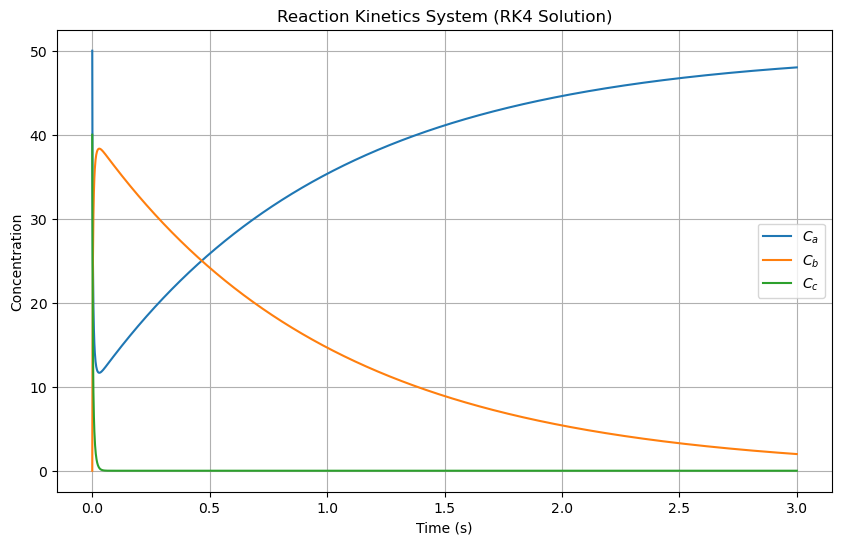

At t=3s: Ca=48.0163, Cb=1.9837, Cc=0.0000


: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def model(y):
    ca, cb, cc = y
    dca_dt = -10.0 * ca * cc + cb
    dcb_dt = 10.0 * ca * cc - cb
    dcc_dt = -10.0 * ca * cc - 2.0 * cc
    return np.array([dca_dt, dcb_dt, dcc_dt], dtype=float)

def rk4_solve(y0, t_span, h):
    
    t = np.arange(t_span[0], t_span[1] + h, h)
    y = np.zeros((len(t), len(y0)), dtype=float)
    y[0] = y0
    
    for i in range(len(t) - 1):
        k1 = model(y[i])
        k2 = model(y[i] + (1/2) * h * k1)
        k3 = model(y[i] + (1/2) * h * k2)
        k4 = model(y[i] + h * k3)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)

    return t, y

# Parameters
initial_conditions = [50, 0, 40]
time_range = [0, 3]
step_size = 0.001

t_res, y_res = rk4_solve(initial_conditions, time_range, step_size)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t_res, y_res[:, 0], label='$C_a$')
plt.plot(t_res, y_res[:, 1], label='$C_b$')
plt.plot(t_res, y_res[:, 2], label='$C_c$')
plt.title('Reaction Kinetics System (RK4 Solution)')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()

# Print specific values
print(f"At t=3s: Ca={y_res[-1,0]:.4f}, Cb={y_res[-1,1]:.4f}, Cc={y_res[-1,2]:.4f}")

## Q3 : Implement the RK4 Method

Instability detected at t = 0.0121


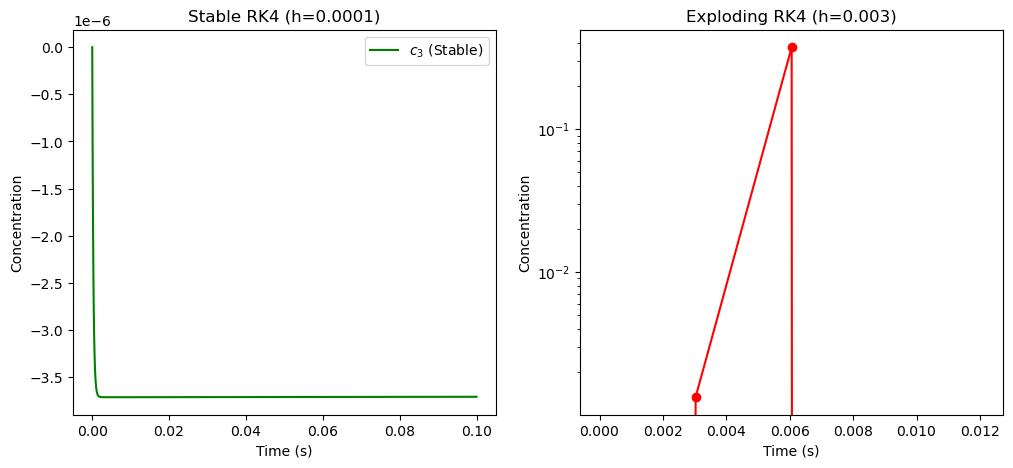

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the stiff ODE system
def model(t, y):
    c1, c2, c3 = y
    dc1_dt = -0.013 * c1 - 1000 * c1 * c3
    dc2_dt = -2500 * c2 * c3
    dc3_dt = -0.013 * c1 - 1000 * c1 * c3 - 2500 * c2 * c3
    return np.array([dc1_dt, dc2_dt, dc3_dt])

# 2. RK4 Implementation
def rk4_solve(f, y0, t_start, t_end, h):
    steps = int((t_end - t_start) / h)
    t = np.linspace(t_start, t_end, steps + 1)
    y = np.zeros((steps + 1, len(y0)))
    y[0] = y0
    
    for i in range(steps):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        
        # Safety break: If values explode to astronomical numbers, stop the loop
        if np.any(np.abs(y[i+1]) > 1e10):
            print(f"Instability detected at t = {t[i+1]:.4f}")
            return t[:i+2], y[:i+2]
            
    return t, y

# 3. Parameters
y0 = [1.0, 1.0, 0.0]
t_range = [0, 0.1] # We only need a tiny time window to see the explosion

# Case 1: Stable (h = 0.0001)
t_stable, y_stable = rk4_solve(model, y0, t_range[0], t_range[1], 0.0001)

# Case 2: Exploding (h = 0.003) - purposefully too large for the stiff term
t_explode, y_explode = rk4_solve(model, y0, t_range[0], t_range[1], 0.003)

# 4. Plotting the Comparison
plt.figure(figsize=(12, 5))

# Plot Stable Solution
plt.subplot(1, 2, 1)
plt.plot(t_stable, y_stable[:, 2], color='green', label='$c_3$ (Stable)')
plt.title("Stable RK4 (h=0.0001)")
plt.xlabel("Time (s)")
plt.ylabel("Concentration")
plt.legend()

# Plot Exploding Solution
plt.subplot(1, 2, 2)
plt.plot(t_explode, y_explode[:, 2], 'ro-', label='$c_3$ (Exploding)')
plt.title("Exploding RK4 (h=0.003)")
plt.xlabel("Time (s)")
plt.ylabel("Concentration")
plt.yscale('log')

## Stiffness

RK45 (Non-stiff) Evaluations: 405782, Time: 4.4142s
Radau (Stiff) Evaluations: 58, Time: 0.0175s


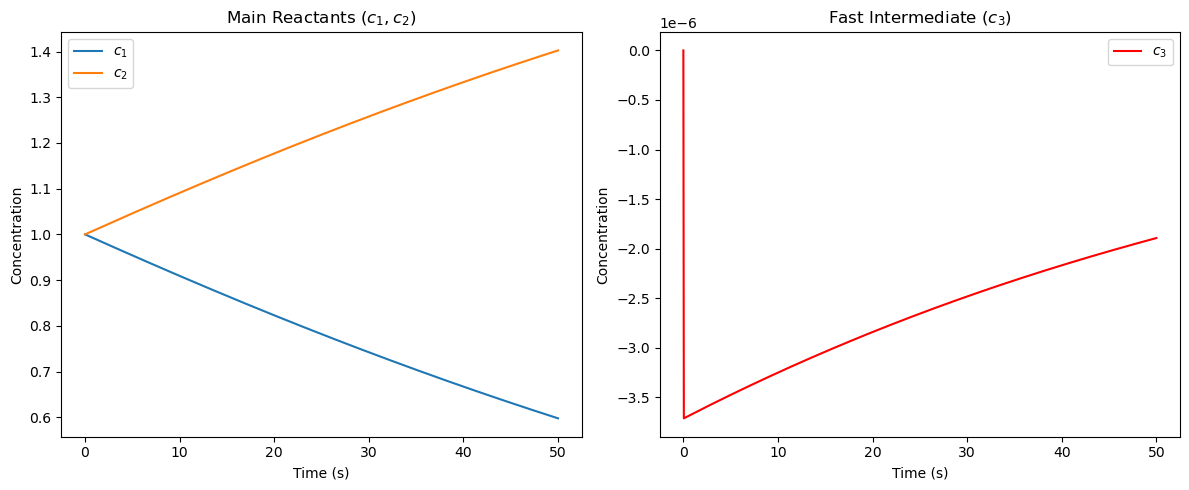

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

# Define the stiff ODE system
def stiff_system(t, y):
    c1, c2, c3 = y
    dc1_dt = -0.013 * c1 - 1000 * c1 * c3
    dc2_dt = -2500 * c2 * c3
    dc3_dt = -0.013 * c1 - 1000 * c1 * c3 - 2500 * c2 * c3
    return [dc1_dt, dc2_dt, dc3_dt]

# Parameters
y0 = [1, 1, 0]
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# 1. Solving with a non-stiff solver (RK45)
start = time.time()
sol_rk45 = solve_ivp(stiff_system, t_span, y0, method='RK45', t_eval=t_eval)
rk45_time = time.time() - start

# 2. Solving with a stiff solver (Radau)
start = time.time()
sol_stiff = solve_ivp(stiff_system, t_span, y0, method='Radau', t_eval=t_eval)
stiff_time = time.time() - start

# Performance Comparison
print(f"RK45 (Non-stiff) Evaluations: {sol_rk45.nfev}, Time: {rk45_time:.4f}s")
print(f"Radau (Stiff) Evaluations: {sol_stiff.nfev}, Time: {stiff_time:.4f}s")

# Plotting Results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sol_stiff.t, sol_stiff.y[0], label='$c_1$')
plt.plot(sol_stiff.t, sol_stiff.y[1], label='$c_2$')
plt.title('Main Reactants ($c_1, c_2$)')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[2], label='$c_3$', color='red')
plt.title('Fast Intermediate ($c_3$)')
plt.xlabel('Time (s)')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()